[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/pjmartel/teaching/master?filepath=enzymology%2FECB_plot_qgrid.ipynb)


#### Michaelis-Menten parameters with the direct linear plot

This is notebook implements the direct linear plot method
for estimation of the Vmax and Km parameters.


In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import numpy.random as rnd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
from seaborn import regplot
from scipy.stats import linregress
style.use('default')
rcParams.update({'axes.grid': True})
rcParams.update({'errorbar.capsize': 2})
pd.options.display.float_format = '{:,.3f}'.format
import ipywidgets as ipyw
import qgrid

In [2]:
# Michaelis-Menten equation
def MM(K,V,s):
  return V*s/(K+s)

In [3]:
# Function to validate input by data type
def check_input(f_type,message):
    """
Wrapper around the input function, reads input
until it matches the required data type. 
    """
    flag = True
    while flag:
        value = input(message)
        try:
            value = f_type(value)
            flag = False
        except ValueError:
            pass
    return value

In [4]:
# Read the number of points and replicates
npoints = check_input(int,"Number of points? ")
nrepl = check_input(int,"Number of replicates? ")

Number of points? 2
Number of replicates? 2


In [7]:
# create an empy pandas data frame with the
# npoint lines and nrepl+1 columns
#
columns = ['[A]']
columns = columns + ['v'+str(i+1) for i in range(nrepl)]
enz_data = pd.DataFrame(np.zeros((npoints, nrepl+1)),columns=columns)
# Create a qgrid table to input the data
qgrid_widget = qgrid.show_grid(enz_data, show_toolbar=False)
qgrid_widget.layout = ipyw.Layout(width='50%')
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
enz_data = qgrid_widget.get_changed_df()
enz_data['Mean v']=enz_data.iloc[:,1:].mean(axis=1)
enz_data['Std v']=enz_data.iloc[:,1:-1].std(axis=1)
#enz_data['fit_error']=enz_data['Mean v']-MM(Km,Vmax,enz_data['[A]'])
enz_data

,[A],v1,v2,Mean v,Std v
0,1.000,2.000,3.000,2.500,0.707
1,3.000,7.000,9.000,8.000,1.414


In [9]:
# Get concentrations and velocities from the dataframe
v = np.array(enz_data.iloc[:,1:-2])
s = np.array(enz_data['[A]'])

Computing 1 intersections
Direct Linear plot estimates:
    Km = -33.000, Vmax= -80.000


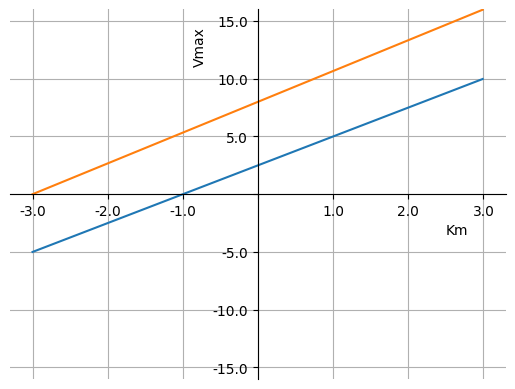

In [10]:
# Eisenthal Cornish-Bowden direct linear plot
vm = v.mean(axis=1)
x = np.arange(-s.max(),s.max(),0.01)
int_Vmax = []
int_Km = []
mmlines = np.vstack((vm/s,vm)).T
n_int = len(s)*(len(s)-1)//2
#Km_int = np.zeros(n_int)
#Vmax_int = np.zeros(n_int)

for m, b in mmlines:
  plt.plot(x,m*x+b)

print("Computing {:d} intersections".format(n_int))
for i in range(mmlines.shape[0]):
  for j in range(i):
    m1, b1 = mmlines[i]
    m2, b2 = mmlines[j]
    x = (b2-b1)/(m1-m2)
    y = (b2*m1-b1*m2)/(m1-m2)
    int_Km.append(x)
    int_Vmax.append(y)
    #print(x,y)
    #pass
    #print(i,j,mmlines[i],mmlines[j])rray python

ax = plt.gca()
ax.axis([-1.1*s.max(),1.1*s.max(),-2*vm.max(),2*vm.max()])
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel("Km",x=0.9)
ax.set_ylabel("Vmax",y=0.9)

# Remove zeros on x an y axis
import matplotlib.ticker as ticker
func = lambda x, pos: "" if np.isclose(x,0) else x
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))

ECB_Km = np.median(int_Km)
ECB_Vmax = np.median(int_Vmax)
print("Direct Linear plot estimates:") 
print("    Km = {:5.3f}, Vmax= {:5.3f}".format(ECB_Km, ECB_Vmax))